Run the code blocks below to download the datasets `horse-or-human.zip` and `validation-horse-or-human.zip` respectively.

In [9]:
import os
import gdown

path = './files/'
if not os.path.exists(path):
    os.makedirs(path)

url = 'https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5'
trn = './files/horse-or-human.zip'
gdown.download(url, trn, quiet=False)

url = 'https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U'
val = './files/validation-horse-or-human.zip'
gdown.download(url, val, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: D:\OneDrive - Montana State University\Learning\Coursera\Intro_to_TensorFlow_for_AI_ML_DL\files\horse-or-human.zip
100%|███████████████████████████████████████████████████████████████████████████████| 150M/150M [00:14<00:00, 10.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: D:\OneDrive - Montana State University\Learning\Coursera\Intro_to_TensorFlow_for_AI_ML_DL\files\validation-horse-or-human.zip
100%|█████████████████████████████████████████████████████████████████████████████| 11.5M/11.5M [00:01<00:00, 10.1MB/s]


'./files/validation-horse-or-human.zip'

Unzip the dataset

In [10]:
import zipfile

zip_ref  = zipfile.ZipFile(trn, 'r')
zip_ref.extractall('./files/horse-or-human')

zip_ref  = zipfile.ZipFile(val, 'r')
zip_ref.extractall('./files/validation-horse-or-human')

zip_ref.close()

Define the directories and take a look at the filenames

In [11]:
train_horse_dir = os.path.join('./files/horse-or-human/horses/')
train_human_dir = os.path.join('./files/horse-or-human/humans/')

validation_horse_dir = os.path.join('./files/validation-horse-or-human/horses')
validation_human_dir = os.path.join('./files/validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

print(f'Total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'Total validation human images: {len(os.listdir(train_human_dir))}')
print(f'Total training horse images: {len(os.listdir(validation_horse_dir))}')
print(f'Total validation human images: {len(os.listdir(validation_human_dir))}')

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']
Total training horse images: 500
Total validation human images: 527
Total training horse images: 128
Total validation human images: 128


Build the model with a compact input size of 150x150 instead of 300x300

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution (You can uncomment the 4th and 5th conv layers later to see the effect)
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

Data Preprocessing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './files/horse-or-human/', # source directory
    target_size=(150,150), # All images will be resized to 150x150
    batch_size=128,
    # Since you used binary_crossentropy loss, you need binary labels
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    './files/validation-horse-or-human/', 
    target_size=(150, 150),  
    batch_size=32,
    # Since you used binary_crossentropy loss, you need binary labels
    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [15]:
# Training

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 12s 2s/step - loss: 1.0735 - accuracy: 0.6452 - val_loss: 0.5621 - val_accuracy: 0.7148
Epoch 2/15
8/8 [==============================] - 7s 908ms/step - loss: 0.2482 - accuracy: 0.9055 - val_loss: 1.3660 - val_accuracy: 0.7617
Epoch 3/15
8/8 [==============================] - 7s 1s/step - loss: 0.1924 - accuracy: 0.9155 - val_loss: 1.2695 - val_accuracy: 0.8047
Epoch 4/15
8/8 [==============================] - 8s 912ms/step - loss: 0.1377 - accuracy: 0.9555 - val_loss: 1.2511 - val_accuracy: 0.8359
Epoch 5/15
8/8 [==============================] - 7s 896ms/step - loss: 0.1085 - accuracy: 0.9600 - val_loss: 1.1943 - val_accuracy: 0.8359
Epoch 6/15
8/8 [==============================] - 8s 914ms/step - loss: 0.0279 - accuracy: 0.9900 - val_loss: 2.2485 - val_accuracy: 0.8008
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.0116 - accuracy: 0.9989 - val_loss: 2.4381 - val_accuracy: 0.7891
Epoch 8/15
8/8 [============

In [16]:
# Prediction

import tkinter as tk
import tkinter.filedialog as fd

import numpy as np
from keras.preprocessing import image

root = tk.Tk()
filez = fd.askopenfilenames(parent=root, title='Choose a file')
print(filez)

for i, path in enumerate(filez):
    img = image.load_img(path, target_size = (150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    print(classes[0])
    if classes[0] > 0.5:
        print(path + 'is a human')
    else:
        print(path + 'is a horse')

('D:/OneDrive - Montana State University/Learning/Coursera/Intro_to_TensorFlow_for_AI_ML_DL/files/pixabay_images/horse-g0a970d487_640.jpg', 'D:/OneDrive - Montana State University/Learning/Coursera/Intro_to_TensorFlow_for_AI_ML_DL/files/pixabay_images/horse-g3e542f304_640.jpg', 'D:/OneDrive - Montana State University/Learning/Coursera/Intro_to_TensorFlow_for_AI_ML_DL/files/pixabay_images/horse-gb3b058e63_640.jpg', 'D:/OneDrive - Montana State University/Learning/Coursera/Intro_to_TensorFlow_for_AI_ML_DL/files/pixabay_images/photographer-g91148e61c_640.jpg', 'D:/OneDrive - Montana State University/Learning/Coursera/Intro_to_TensorFlow_for_AI_ML_DL/files/pixabay_images/suitcase-g9d350dfd2_640.jpg', 'D:/OneDrive - Montana State University/Learning/Coursera/Intro_to_TensorFlow_for_AI_ML_DL/files/pixabay_images/woman-g0da493694_640.jpg')
[0.]
D:/OneDrive - Montana State University/Learning/Coursera/Intro_to_TensorFlow_for_AI_ML_DL/files/pixabay_images/horse-g0a970d487_640.jpgis a horse
[0.]

C:\Users\Sid\AppData\Local\Temp/ipykernel_26120/34744779.py:49: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


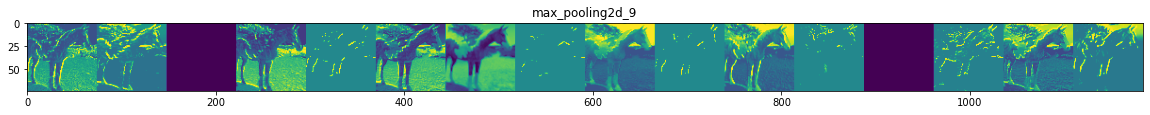

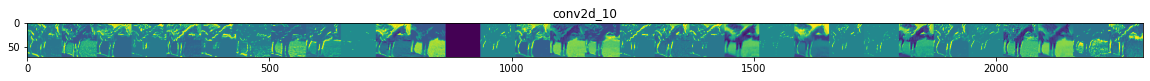

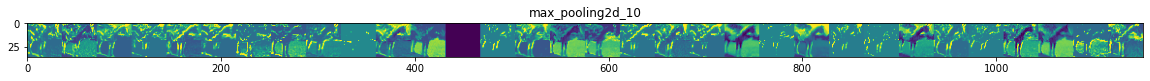

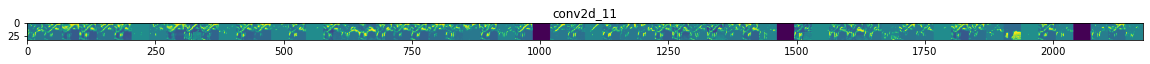

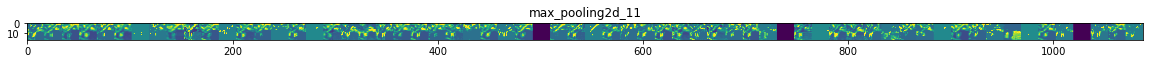

In [18]:
# Visualizing Intermediate Representations

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# let's define a new model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# let's prepare a random input image from the training set
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size = (150, 150)) # this is a PIL (python image library) image
x = img_to_array(img) # numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # numpy array with shape (1, 150, 150, 3)

# rescale by 1/255
x /= 255

# let's run the image through our network,  thus obtaining all
# intermediate representations for this image
successive_feature_maps = visualization_model.predict(x)

# these are the name of the layers
layer_names = [layer.name for layer in model.layers[1:]]

# display the representation
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # do this for conv/maxpool layers, not fully-connected layers
        n_features = feature_map.shape[-1] # number of features in feature map
        # feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # tile images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # post-process the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # display the grid
        scale = 20./ n_features
        plt.figure(figsize = (scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')